# Feature


In [1]:
import pandas as pd

ppga_df = pd.read_csv("../results/performance/ppga_MLPClassifier_feature_toy.csv")
deap_df = pd.read_csv("../results/performance/deap_MLPClassifier_feature_toy.csv")

In [2]:
def group(df: pd.DataFrame) -> pd.DataFrame:
    df = (
        df.groupby(by=["classifier", "features", "population_size", "workers"])[
            ["time", "time_std", "ptime", "ptime_std"]
        ]
        .mean()
        .reset_index()
    )

    return df


ppga_df = group(ppga_df)
deap_df = group(deap_df)

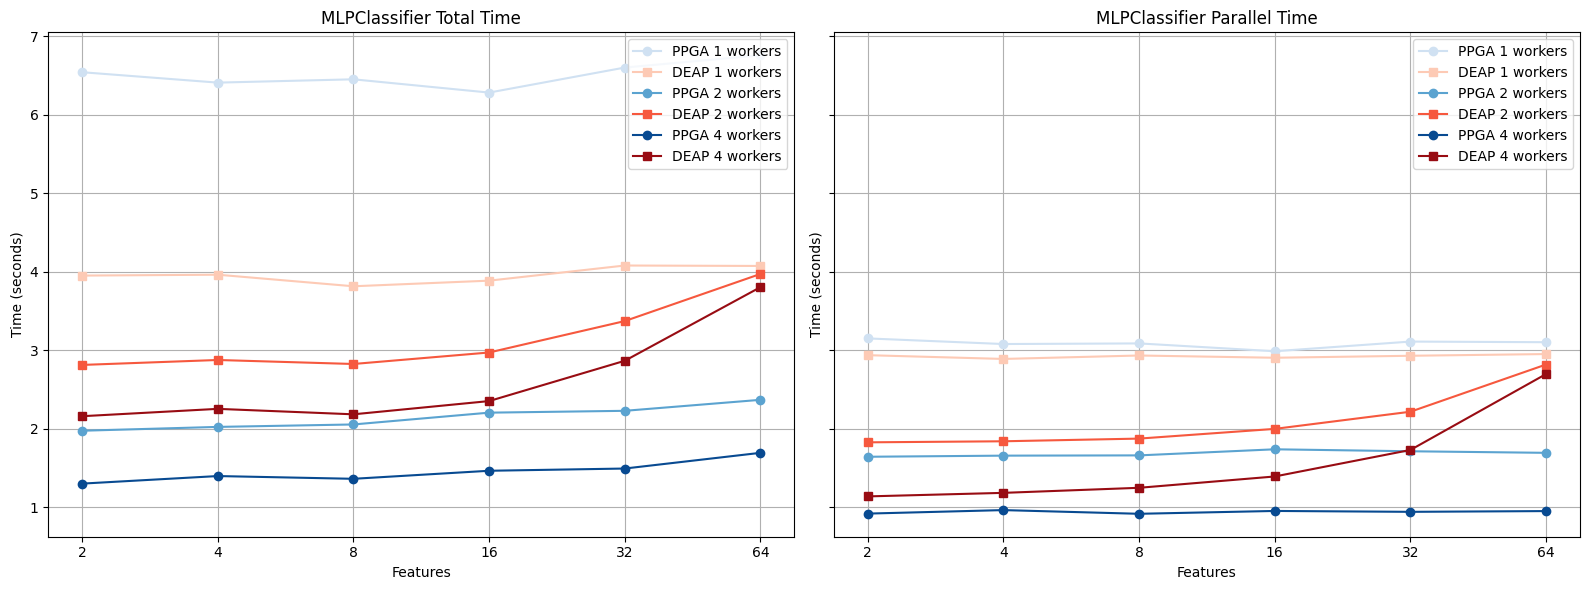

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def plot_time(ppga_df: pd.DataFrame, deap_df: pd.DataFrame):
    models = ppga_df["classifier"].unique()
    fig, axes = plt.subplots(len(models), 2, sharey=True, figsize=(16, 6))

    features = ppga_df["features"].unique()
    workers = ppga_df["workers"].unique()

    ppga_color = plt.cm.Blues(np.linspace(0.2, 0.9, len(workers)))
    deap_color = plt.cm.Reds(np.linspace(0.2, 0.9, len(workers)))

    for i, m in enumerate(models):
        for j, w in enumerate(workers):
            mask = ppga_df["workers"] == w
            f = ppga_df[mask]["features"]

            # Total time
            t = ppga_df[mask]["time"]
            axes[0].plot(
                f, t, color=ppga_color[j], marker="o", label=f"PPGA {w} workers"
            )

            t = deap_df[mask]["time"]
            axes[0].plot(
                f, t, color=deap_color[j], marker="s", label=f"DEAP {w} workers"
            )

            axes[0].set_title(f"{m} Total Time")
            axes[0].set_xlabel("Features")
            axes[0].set_ylabel("Time (seconds)")
            axes[0].set_xscale("log", base=2)
            axes[0].set_xticks(features, labels=features)
            axes[0].legend()
            axes[0].grid(True)

            # Parallel time
            t = ppga_df[mask]["ptime"]
            axes[1].plot(
                f, t, color=ppga_color[j], marker="o", label=f"PPGA {w} workers"
            )

            t = deap_df[mask]["ptime"]
            axes[1].plot(
                f, t, color=deap_color[j], marker="s", label=f"DEAP {w} workers"
            )

            axes[1].set_title(f"{m} Parallel Time")
            axes[1].set_xlabel("Features")
            axes[1].set_ylabel("Time (seconds)")
            axes[1].set_xscale("log", base=2)
            axes[1].set_xticks(features, labels=features)
            axes[1].legend()
            axes[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_time(ppga_df, deap_df)